In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [46]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [47]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [48]:
#dislay first 5 rows from the measurement table
measurement_table = engine.execute("select * from measurement").fetchall()

print(measurement_table[:5])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0)]


In [49]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [50]:
#reflect DB into ORM class
base = automap_base()
base.prepare(engine, reflect=True)
measurement = base.classes.measurement
station = base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f921dc776d0>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
latestdate = session.query(measurement.date).order_by(measurement.date.desc()).first().date

print(latestdate)

2017-08-23


In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latestdate = session.query(measurement.date).order_by(measurement.date.desc()).first().date
oneyear_ago = pd.to_datetime(latestdate) - pd.DateOffset(years=1)


In [54]:
last_12_months = pd.to_datetime(str(latestdate), format='%Y-%m-%d') - pd.DateOffset(days=365)
last_12_months

Timestamp('2016-08-23 00:00:00')

In [58]:

# 
last_12_months = (dt.datetime.strptime(latestdate, '%Y-%m-%d') - 
                  dt.timedelta(days=365)).strftime('%Y-%m-%d')
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_12_months).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [65]:

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df.sort_values(by='Date', inplace=True)

precipitation_df.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [66]:
print(precipitation_df.columns)

Index(['Date', 'Precipitation'], dtype='object')


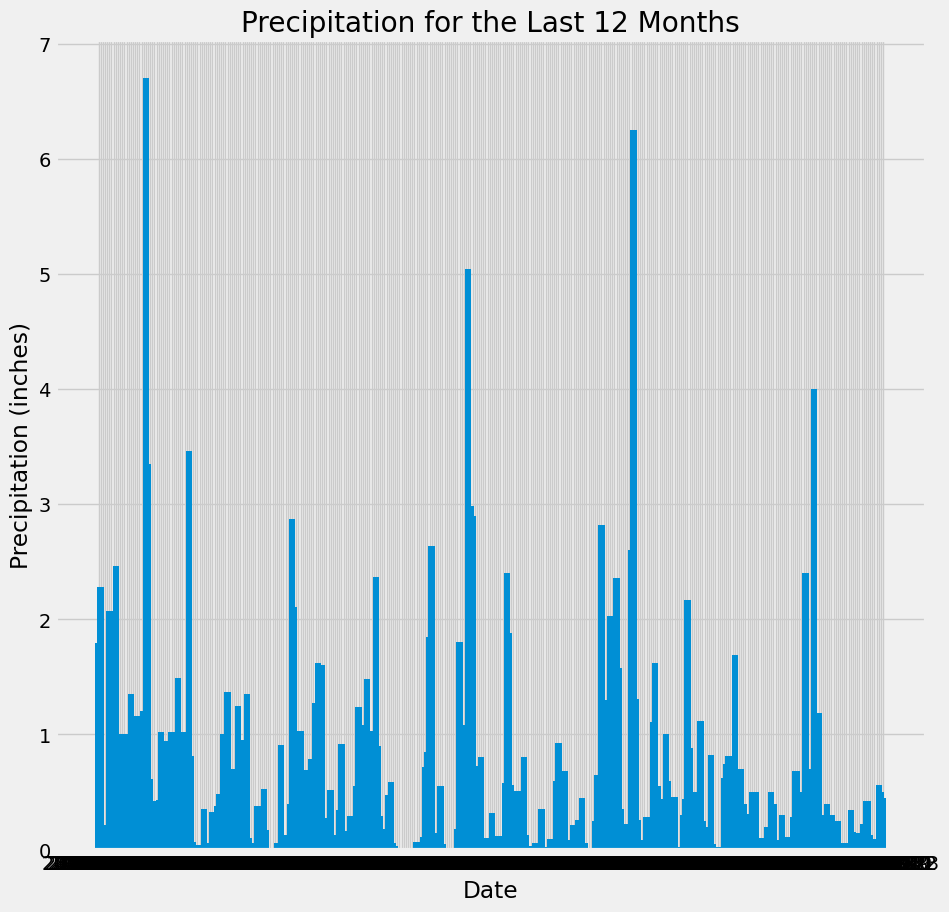

In [69]:

# Use Pandas Plotting with Matplotlib to plot the data
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data on the axis object
ax.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=3)

# Add labels and title to the plot
ax.legend
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Precipitation for the Last 12 Months')

# Show the plot
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [79]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station)
# List the stations and the counts in descending order.
results = most_active_stations.order_by(func.count(measurement.station).desc()).all()

results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
        filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

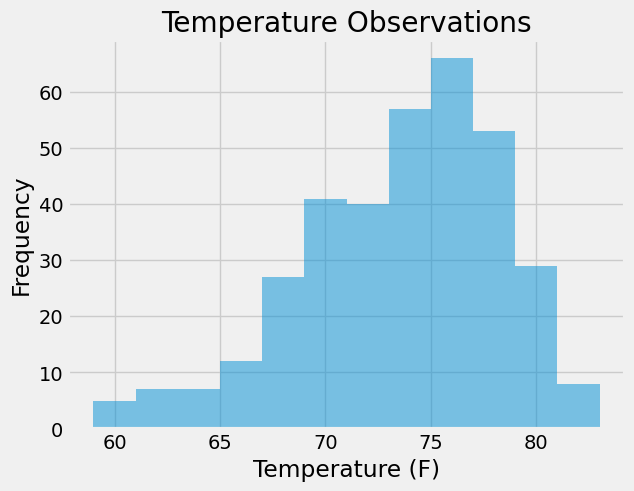

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observations = session.query(measurement.station, measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date >= last_12_months).all()
temp_observations_df = pd.DataFrame(temp_observations, columns= ['Station', 'TOBS'])
temp_observations_df.set_index('Station', inplace=True)
temp_observations_df.head(10)

# Extract the TOBS column from the dataframe
tobs_data = temp_observations_df['TOBS']

# Plot the histogram with 12 bins
plt.hist(tobs_data, bins=12, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observations')

# Show the plot
plt.show()


# Close session

In [94]:
# Close Session
session.close()